# **Simulazione MBPO con White Noise**


## **Solar Penalty and Comfort Reward**

----

**Lista degli import**

In [7]:
# Forza l'ambiente corretto per CityLearn e Hydra su Colab
!pip uninstall -y numpy tensorboard tensorflow
!pip install numpy==1.23.5
!pip install tensorflow==2.12.0
!pip install tensorboard==2.12.3
!pip install hydra-core
!pip install citylearn
!pip install omegaconf
!pip install colorednoise
!pip install mujoco

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: tensorboard 2.12.3
Uninstalling tensorboard-2.12.3:
  Successfully uninstalled tensorboard-2.12.3
Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tensorflow>=2.2.0, which is not installed.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, which is not installed.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
pymc 5.23.0 requir

  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl.metadata (1.8 kB)
Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (586.0 MB)
Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.12.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.12.0 which is incompatible.


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/src')

from citylearn.citylearn import CityLearnEnv
from citylearn.reward_function import *
from citylearn.wrappers import *

#import per strutture dati
import pandas as pd
from datetime import datetime

#import per grafici
from IPython.display import display, Markdown

#import per l'utilizzo degli agenti model based
# Inizializza Hydra in modalità programmatica
from hydra import initialize, compose
import numpy as np
import omegaconf
import torch

import os, shutil

os.chdir('/content/drive/MyDrive/Colab Notebooks/src/agents/model_based')


import agents.model_based.mbrl.algorithms.mbpo as mbpo
import agents.model_based.mbrl.util.env as env_util

In [3]:
def run(cfg: omegaconf.DictConfig, test_cfg: omegaconf.DictConfig = None):

    print(f"Using the following algorithm: {cfg.algorithm.name}!")

    env, term_fn, reward_fn = env_util.EnvHandler.make_env(cfg, test_env=False)
    print(f"Using the following reward function: {reward_fn.__class__.__name__}")
    np.random.seed(cfg.seed)
    torch.manual_seed(cfg.seed)
    test_env, *_ = env_util.EnvHandler.make_env(test_cfg, test_env=True)
    mbpo.train(env, test_env, term_fn, cfg, work_dir="./wn_exp/mbpo")
    return env,test_env


from hydra.core.global_hydra import GlobalHydra
GlobalHydra.instance().clear()

initialize(config_path="./mbrl/examples/conf")  # Specifica il percorso della configurazione
cfg = compose(config_name="main_mbpo")  # Carica il file di configurazione principale
test_cfg = compose(config_name="test_mbpo")  # Carica il file di configurazione per il test
[shutil.rmtree(p) if os.path.isdir(p) else os.unlink(p) for p in [os.path.join('./wn_exp/mbpo', f) for f in os.listdir('./wn_exp/mbpo')]]

# Bisogna modificare specificatamente il config essendo in comune
print(cfg.overrides.exploration_type_env)
# Esegui la funzione principale
env, test_env = run(cfg, test_cfg)

<ipython-input-3-445733482135>:17: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize(config_path="./mbrl/examples/conf")  # Specifica il percorso della configurazione
/usr/local/lib/python3.11/dist-packages/hydra/core/default_element.py:124: UserWarning: In 'overrides/mbpo_citylearn': Usage of deprecated keyword in package header '# @package _group_'.
See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/changes_to_package_header for more information
  deprecation_warning(
/usr/local/lib/python3.11/dist-packages/hydra/core/default_element.py:124: UserWarning: In 'overrides/test_citylearn': Usage of deprecated keyword in package header '# @package _group_'.
See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/changes_to_package_header for more information
  deprecation_warning(


white
Using the following algorithm: mbpo!


INFO:root:The dataset names DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/dataset_names.json. Next time DataSet.get_dataset_names is called, it will read from cache unless DataSet.clear_cache is run first.
INFO:root:The citylearn_challenge_2023_phase_2_local_evaluation dataset DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/datasets. Next time DataSet.get_dataset('citylearn_challenge_2023_phase_2_local_evaluation') is called, it will read from cache unless DataSet.clear_cache is run first.
INFO:root:The PV sizing data DNE in cache. Will download from intelligent-environments-lab/CityLearn/tree/v2.3.0 GitHub repository and write to /root/.cache/citylearn/v2.3.0/misc. Next time DataSet.get_pv_sizing_data is called, it will read from cache unless DataSet.clear_cache is run first.
INFO:root:The ba

Using the following reward function: SolarPenaltyAndComfortReward


/usr/local/lib/python3.11/dist-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/usr/local/lib/python3.11/dist-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Running MBPO algorithm from a checkpoint!
Using checkpoints from folder ./wn_exp/mbpo
Using minumum variance exponent of -10


/usr/local/lib/python3.11/dist-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/usr/local/lib/python3.11/dist-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


| model_train    | I: 0 | E: 0 | TD: 4028 | VD: 1007 | MLOSS: 4279.3924 | MVSCORE: 407.7701 | MBVSCORE: 407.9068
| model_train    | I: 0 | E: 1 | TD: 4028 | VD: 1007 | MLOSS: 3274.5909 | MVSCORE: 405.4446 | MBVSCORE: 407.9068
| model_train    | I: 0 | E: 2 | TD: 4028 | VD: 1007 | MLOSS: 1962.1646 | MVSCORE: 396.7289 | MBVSCORE: 396.7289
| model_train    | I: 0 | E: 3 | TD: 4028 | VD: 1007 | MLOSS: 1595.8283 | MVSCORE: 380.3319 | MBVSCORE: 380.3319
| model_train    | I: 0 | E: 4 | TD: 4028 | VD: 1007 | MLOSS: 1501.2332 | MVSCORE: 356.9882 | MBVSCORE: 356.9882
| model_train    | I: 0 | E: 5 | TD: 4028 | VD: 1007 | MLOSS: 1368.1148 | MVSCORE: 311.8918 | MBVSCORE: 311.8918
| model_train    | I: 0 | E: 6 | TD: 4028 | VD: 1007 | MLOSS: 1112.5957 | MVSCORE: 221.9807 | MBVSCORE: 221.9807
| model_train    | I: 0 | E: 7 | TD: 4028 | VD: 1007 | MLOSS: 684.4086 | MVSCORE: 106.1846 | MBVSCORE: 106.1846
| model_train    | I: 0 | E: 8 | TD: 4028 | VD: 1007 | MLOSS: 307.0012 | MVSCORE: 48.1991 | MBVSC


----

## **Confronto con Baseline**



In [24]:
env = env.unwrapped
eval_env = test_env.unwrapped
display(eval_env.time_step)


2207

In [23]:
# Vengono filtrare le cost_function desiderate
kpis_names = { 'electricity_consumption_total':'Consumo totale della rete',
               'carbon_emissions_total':'Emissioni',
              'discomfort_proportion':'Proporzione del tempo fuori dal comfort',
              'daily_peak_minus_load_factor_average': 'Misura dell inefficenza nell uso giornaliero della potenza disponibile',
              'daily_peak_average': 'Picco medio giornaliero',
              'all_time_peak_average': 'picco massimo dei consumi nel distretto',
              'one_minus_thermal_resilience_proportion': 'Discomfort proportion in interruzioni elettriche',
              'power_outage_normalized_unserved_energy_total': 'domanda non soddisfatta a causa di carenza di energia',
              'ramping_average': 'differenza media tra consumo al timestep corrente al precedente ',
              #Qua si aggiungono cost_function
}


kpis = eval_env.evaluate()
kpis = kpis[(kpis['cost_function'].isin(kpis_names))].dropna()
kpis = kpis.pivot(index='cost_function', columns='name', values='value').round(3)
display(kpis)



name                                           Building_1  Building_2  \
cost_function                                                           
all_time_peak_average                                 NaN         NaN   
carbon_emissions_total                              0.610       1.626   
daily_peak_average                                    NaN         NaN   
discomfort_proportion                               0.860       0.542   
electricity_consumption_total                       0.610       1.633   
one_minus_thermal_resilience_proportion             0.462       0.462   
power_outage_normalized_unserved_energy_total       0.652       0.802   
ramping_average                                       NaN         NaN   

name                                           Building_3  District  
cost_function                                                        
all_time_peak_average                                 NaN     0.977  
carbon_emissions_total                              1.623     1.286  
daily_peak_average                                    NaN     1.058  
discomfort_proportion                               0.862     0.755  
electricity_consumption_total                       1.627     1.290  
one_minus_thermal_resilience_proportion             0.583     0.502  
power_outage_normalized_unserved_energy_total       0.633     0.696  
ramping_average                                       NaN     1.018


------

## **Comportamento dei consumi**

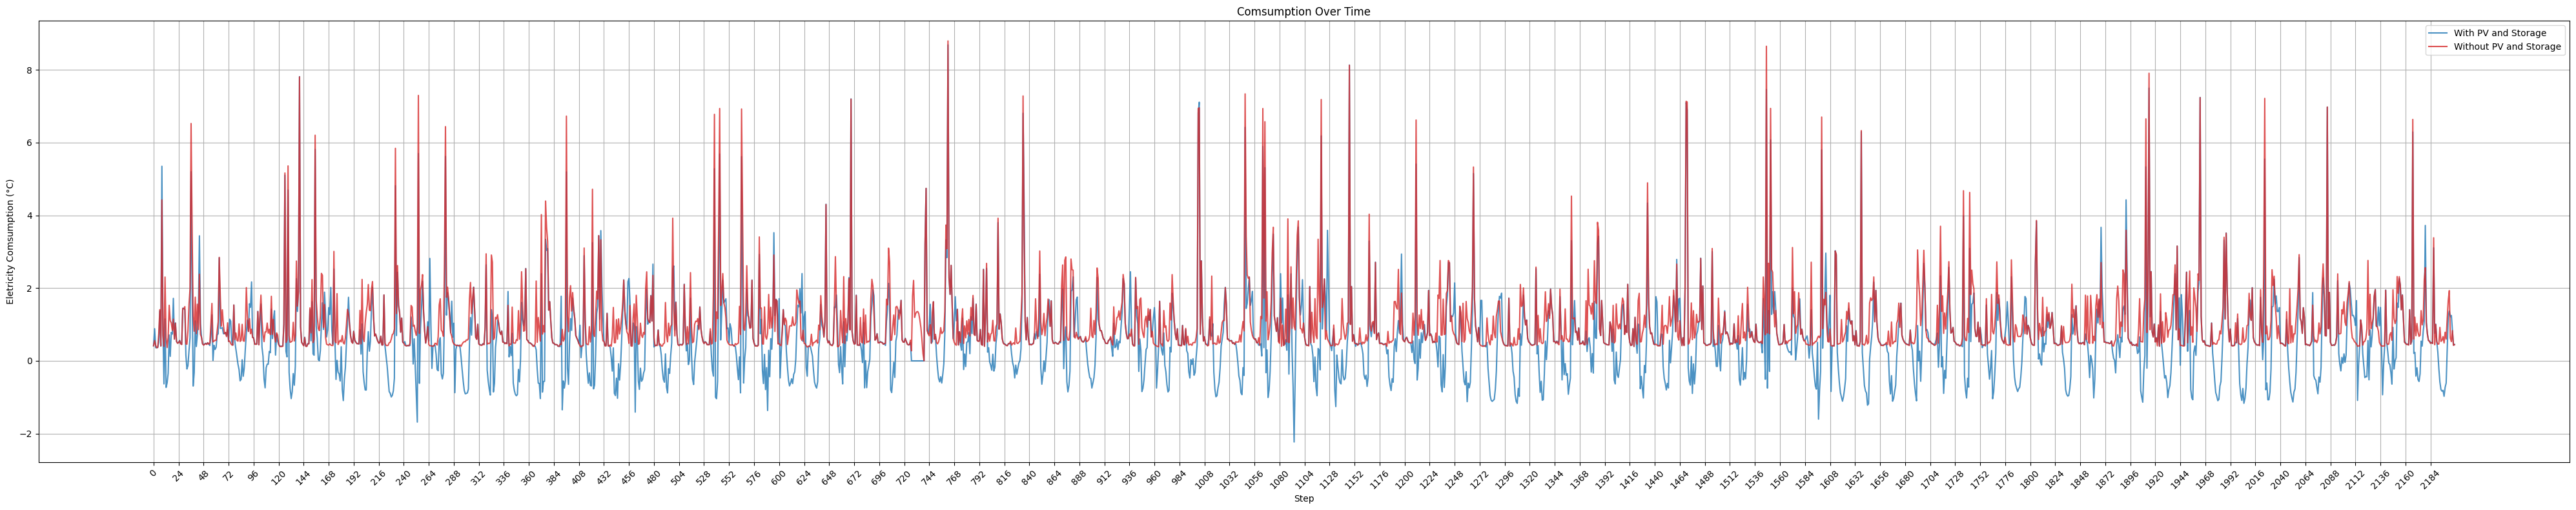

In [22]:
from utils import plotting_functions as plt

num_building = 0

#Calcola il consumo di elettricità totale dell'edificio
energy_with_pv= eval_env.buildings[num_building].net_electricity_consumption
energy_without_pv = eval_env.buildings[num_building].net_electricity_consumption_without_storage_and_pv

plt.plot_comparison_two(
    energy_with_pv,
    energy_without_pv,
    ylabel='Eletricity Comsumption (°C)',
    title='Comsumption Over Time',
    label1='With PV and Storage',
    label2='Without PV and Storage'
)

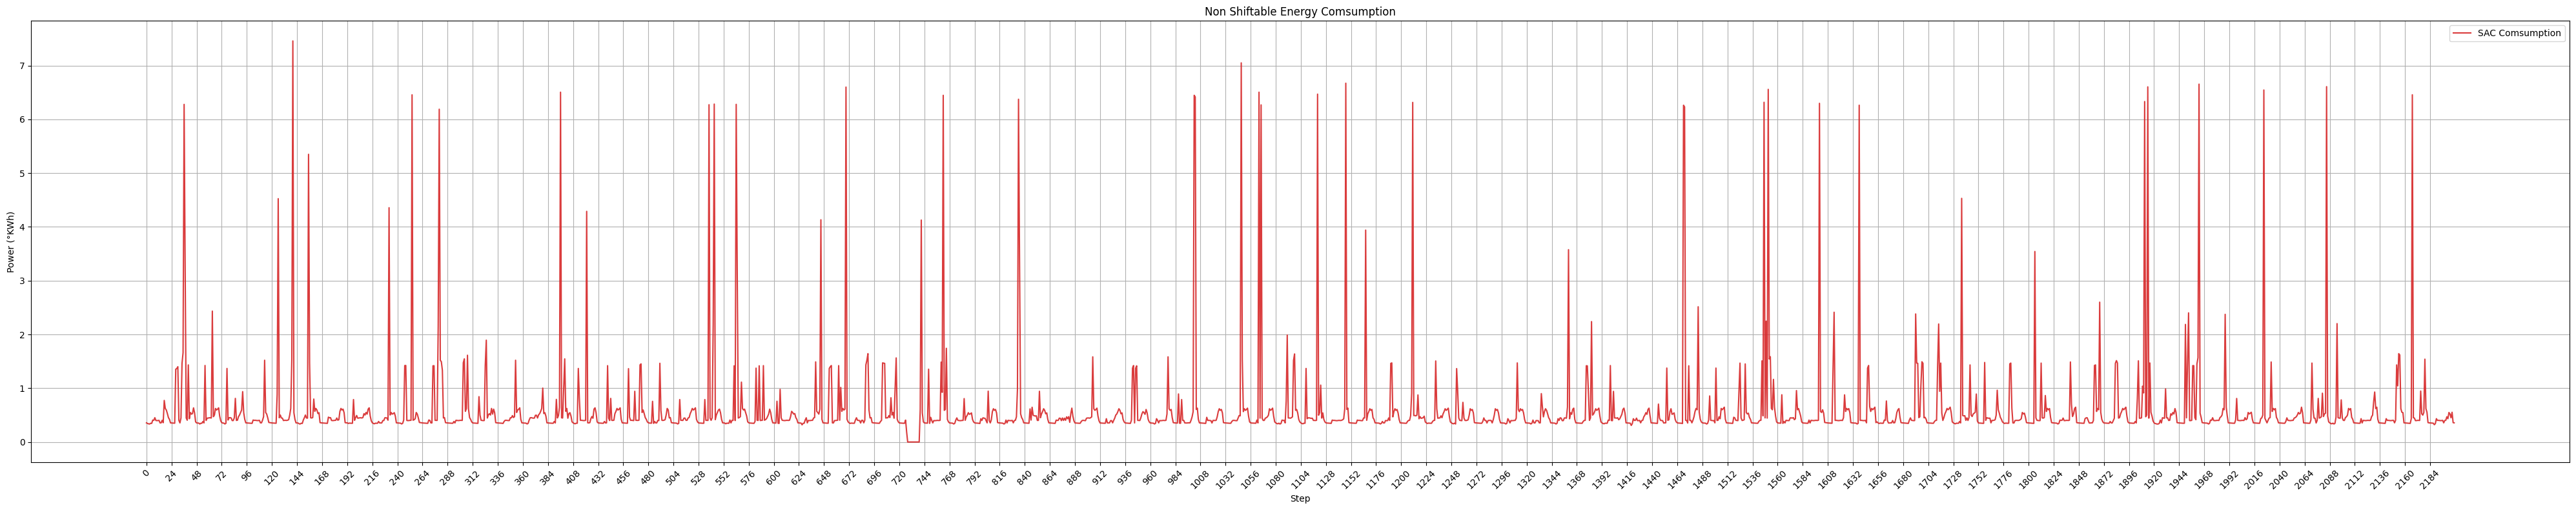

In [21]:

non_energy_sac = eval_env.buildings[num_building].non_shiftable_load_electricity_consumption

plt.plot_single_agent(
    non_energy_sac,
    ylabel='Power (°KWh)',
    title='Non Shiftable Energy Comsumption',
    label='SAC Comsumption',

)


------

## **Comportamento delle temperature**

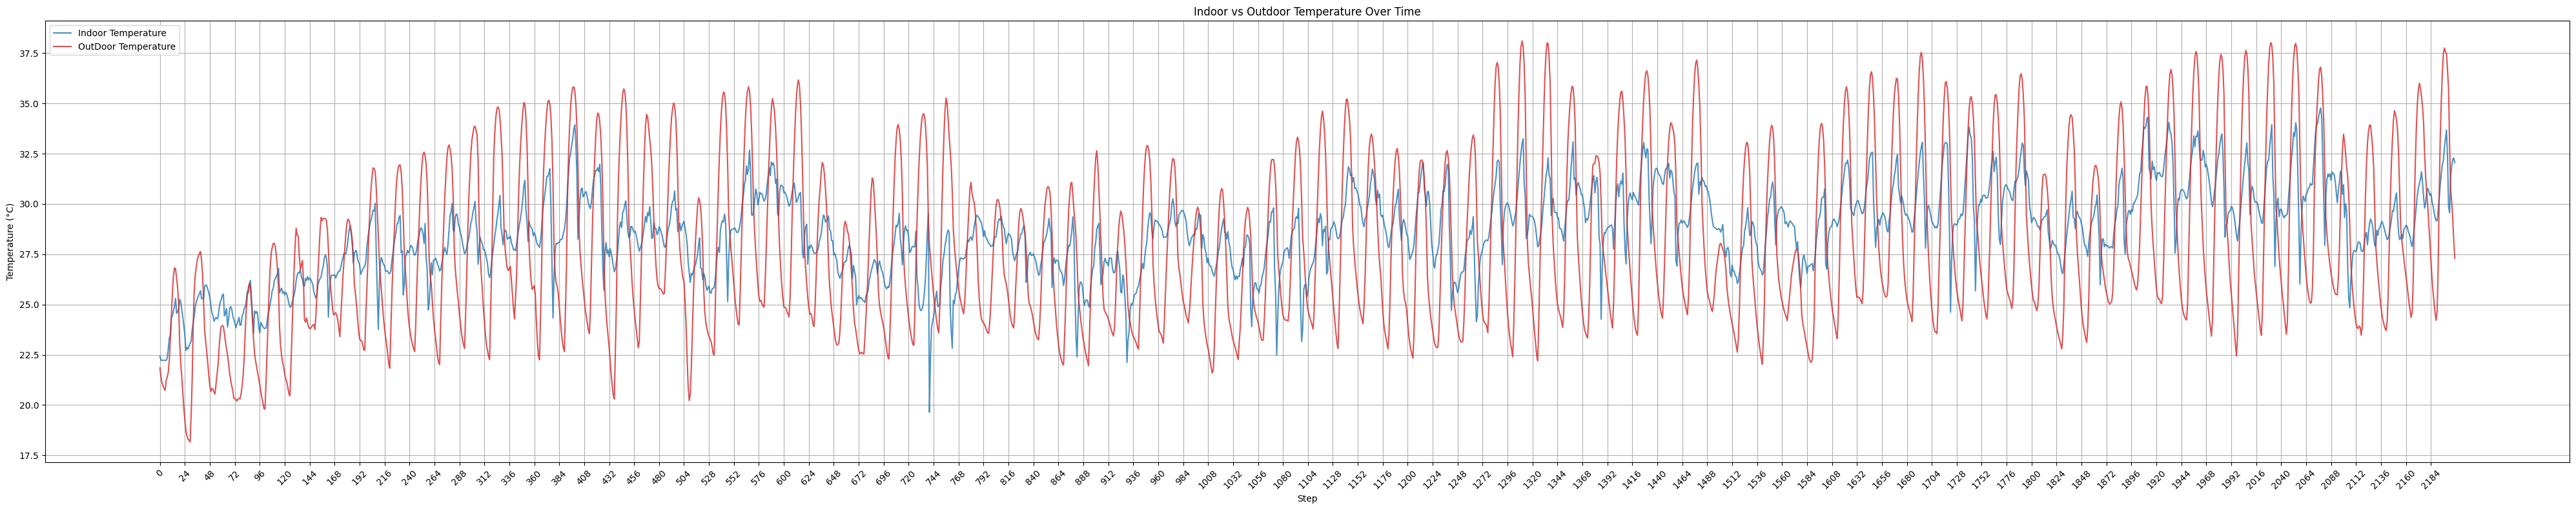

In [20]:
indoor_base_temp = eval_env.buildings[num_building].indoor_dry_bulb_temperature
outdoor_temp = eval_env.buildings[num_building].weather.outdoor_dry_bulb_temperature


plt.plot_comparison_two(
    indoor_base_temp,
    outdoor_temp,
    ylabel='Temperature (°C)',
    title='Indoor vs Outdoor Temperature Over Time',
    label1='Indoor Temperature',
    label2='OutDoor Temperature'
)


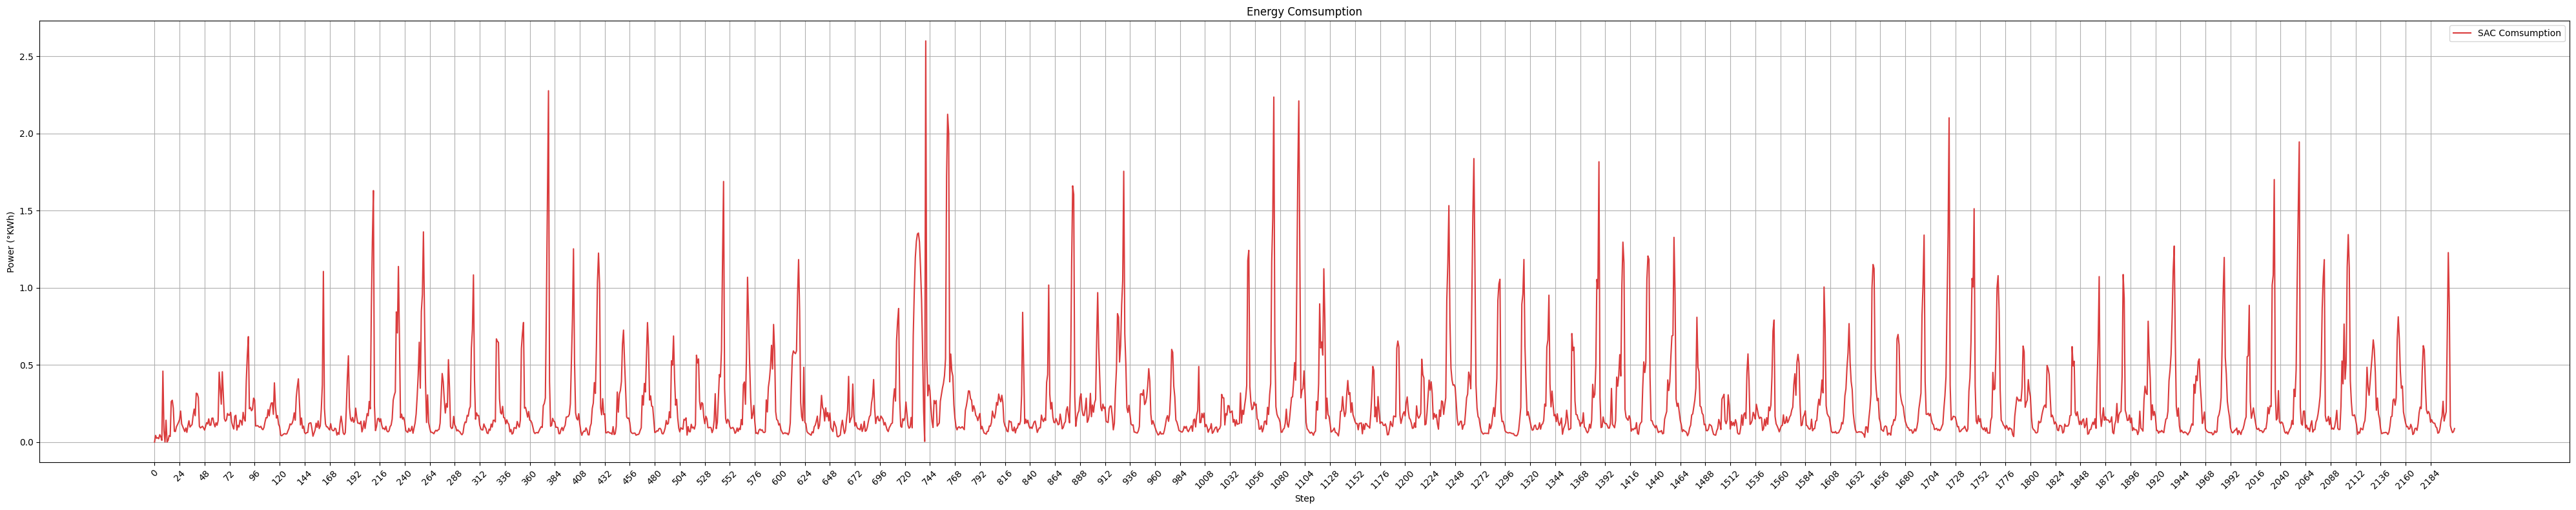

In [19]:
#Questa componente estrae la potenza utilizzata dei dispositivi che servono per regolare la temperatura ambientale

cooler_energy_sac = eval_env.buildings[num_building].cooling_electricity_consumption

plt.plot_single_agent(
    cooler_energy_sac,
    ylabel='Power (°KWh)',
    title='Energy Comsumption',
    label='SAC Comsumption',

)


----

## **Comportamento nell'utilizzo delle batterie**

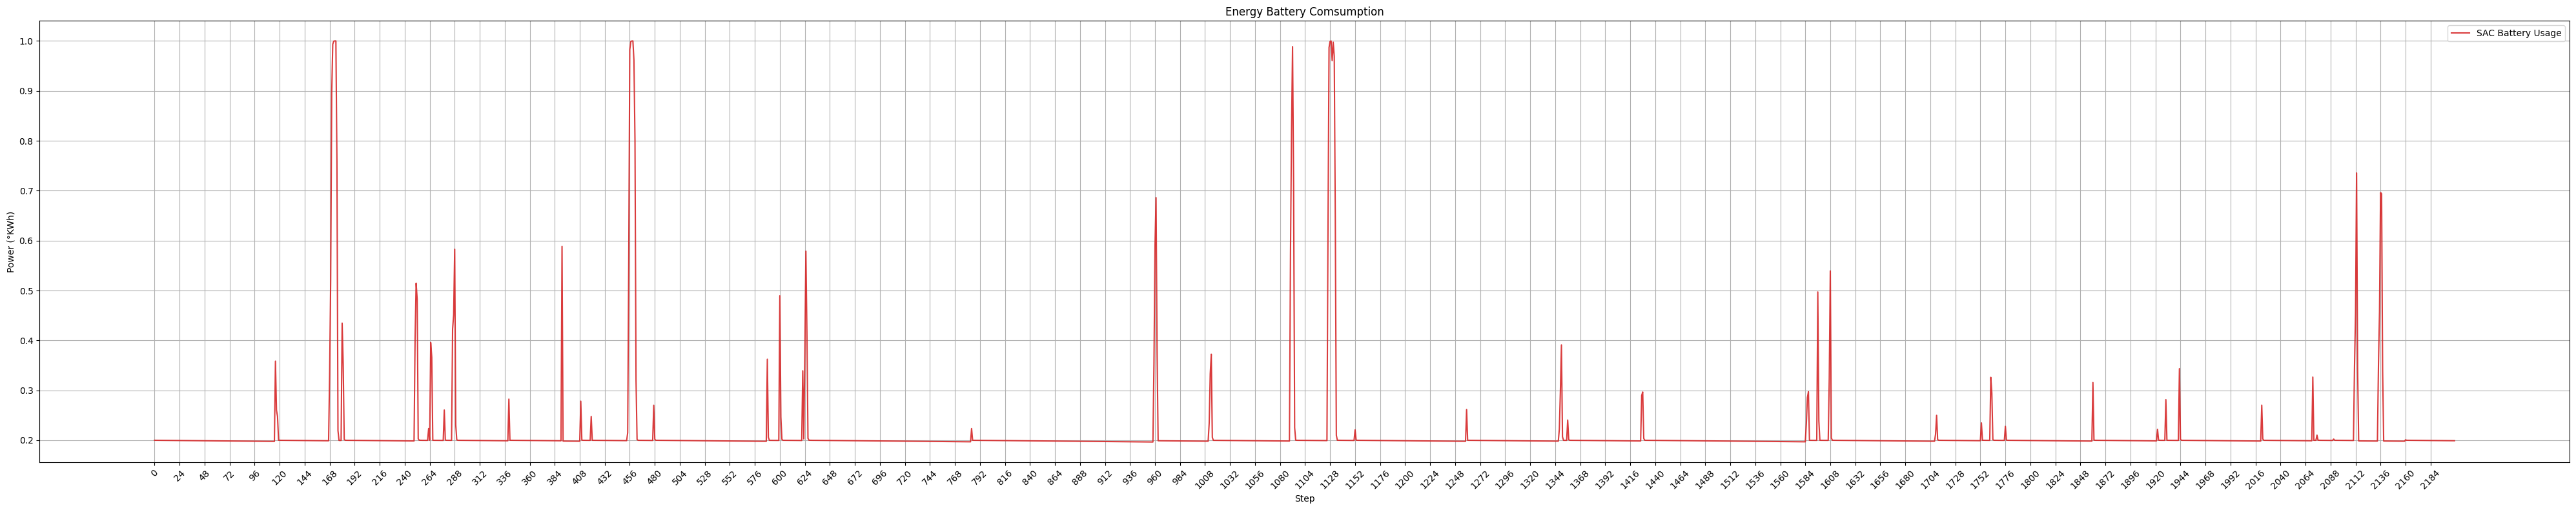

In [18]:
agent_data1 = eval_env.buildings[num_building].electrical_storage.soc

plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='Energy Battery Comsumption',
    label='SAC Battery Usage'
)

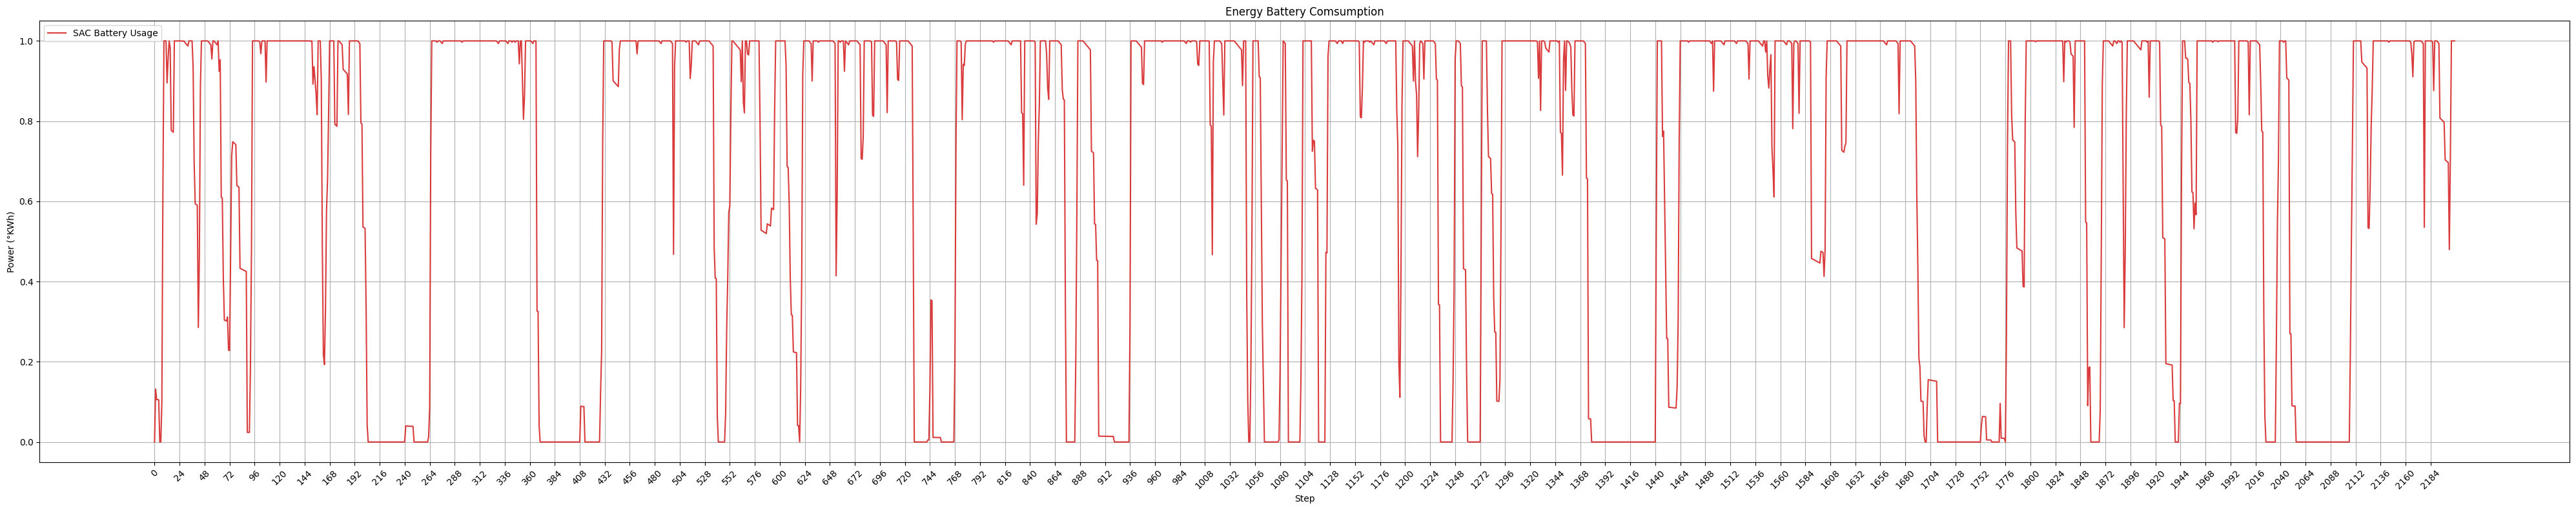

In [17]:
agent_data1 = eval_env.buildings[num_building].dhw_storage.soc

plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='Energy Battery Comsumption',
    label='SAC Battery Usage'
)


----

## **Comportamento delle emissioni**

L'emissioni sono strettamente legate ai consumi di energia della rete, perciò le caratteristiche precedenti si propagano anche qua.

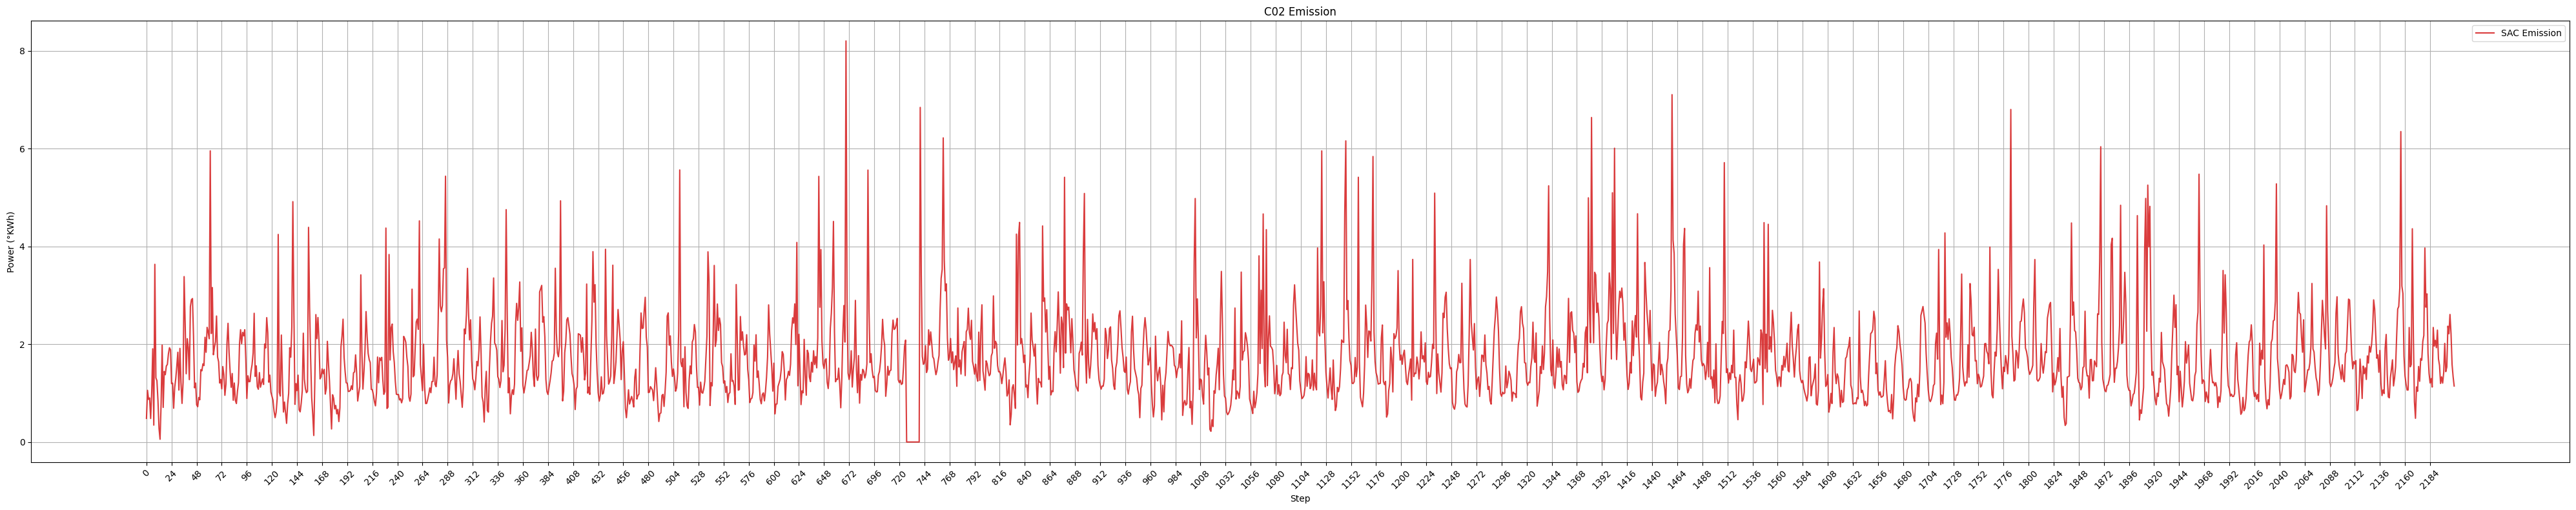

In [16]:
agent_data1 = eval_env.net_electricity_consumption_emission


plt.plot_single_agent(
    agent_data1,
    ylabel='Power (°KWh)',
    title='C02 Emission',
    label='SAC Emission'
)


----

## **Comportamento dei reward e dell'apprendimento**



Episodio  Reward Min  Reward Max   Reward Somma  Reward Media
0         1 -193.252594   -0.618355  -98692.140625    -44.717781
1         2 -142.205978   -1.456089 -113336.062500    -51.352997
2         3 -145.715469   -1.869830  -77644.007812    -35.180794
3         4 -133.627960   -0.958553  -58152.210938    -26.348986
4         5 -124.914398   -1.584930  -81721.796875    -37.028454
5         6 -121.985680   -1.481851  -90237.273438    -40.886848
6         7 -147.586365   -0.876808 -123744.765625    -56.069218

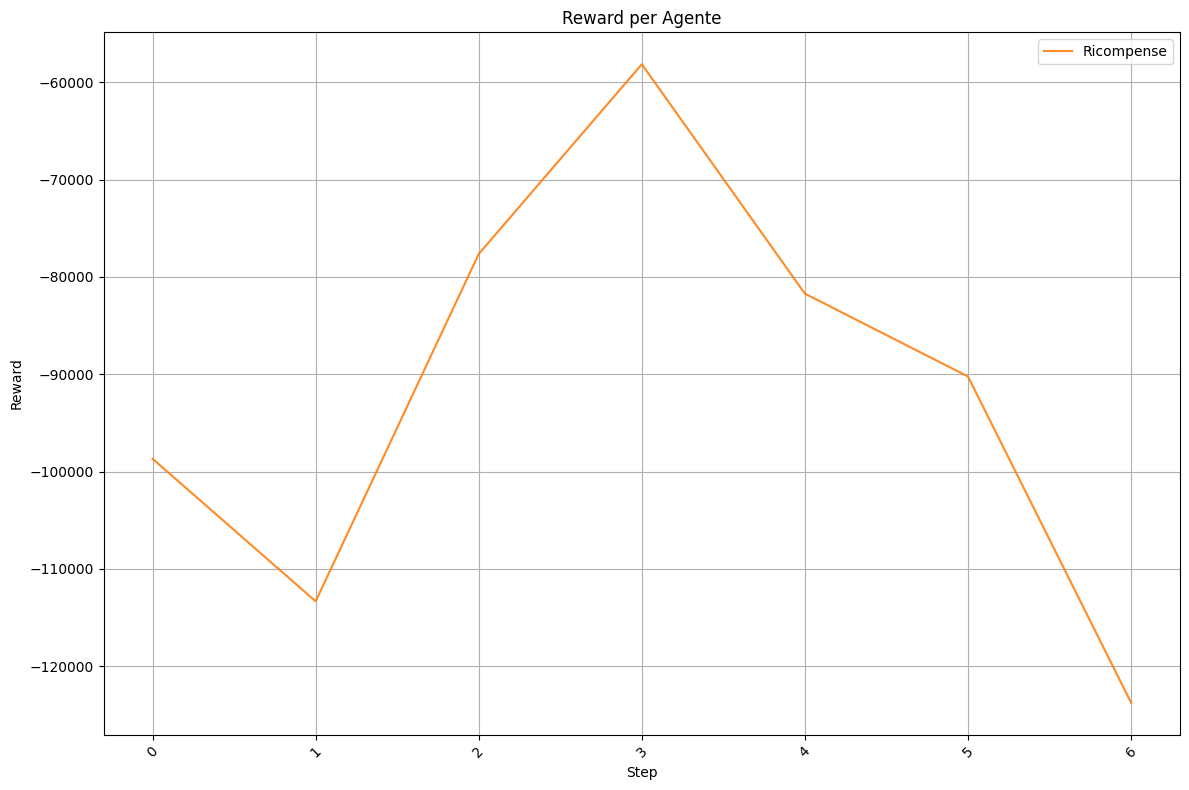

In [14]:
df = plt.create_episode_table(eval_env.episode_rewards)


display(df)

plt.plot_rewards(df['Reward Somma'])


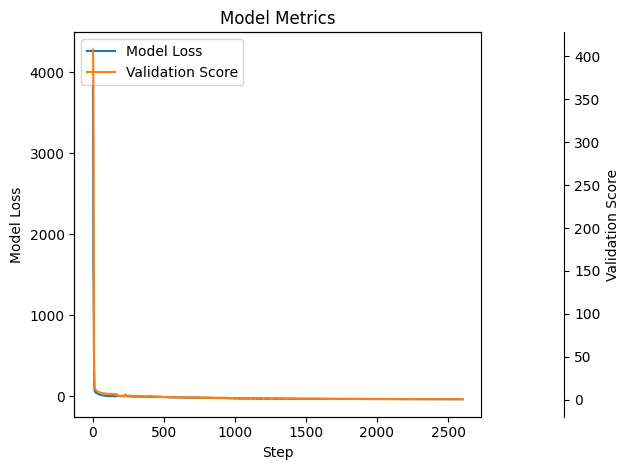

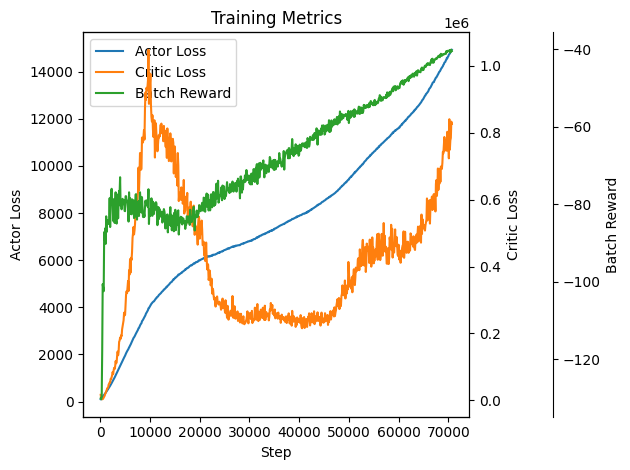

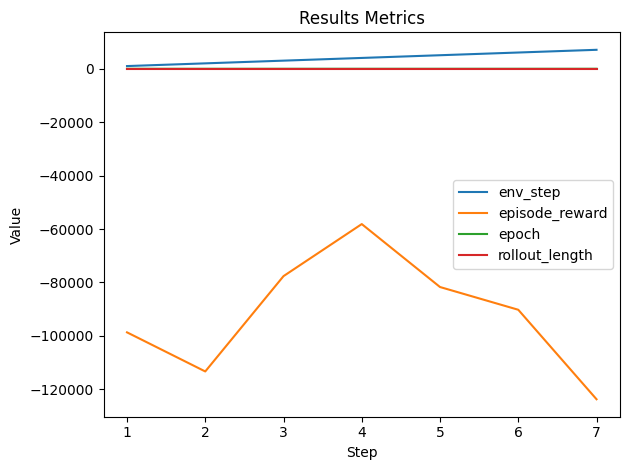

In [15]:
plt.plot_learning_metrics(os.getcwd()+"/wn_exp/mbpo")